In [2]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("C:\\Users\\Client\\Box\\ai_c\\bank_note_data.csv")
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.dtypes

Image.Var     float64
Image.Skew    float64
Image.Curt    float64
Entropy       float64
Class           int64
dtype: object

In [5]:
df.describe()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
px.imshow(df.corr(),title="Correlation Plot of the Bank Note Data")

In [7]:
fig=px.histogram(df, 
                 x="Class",
                 hover_data=df.columns,
                 title="Distribution of Class")
fig.show()

[]

<Figure size 1080x720 with 0 Axes>

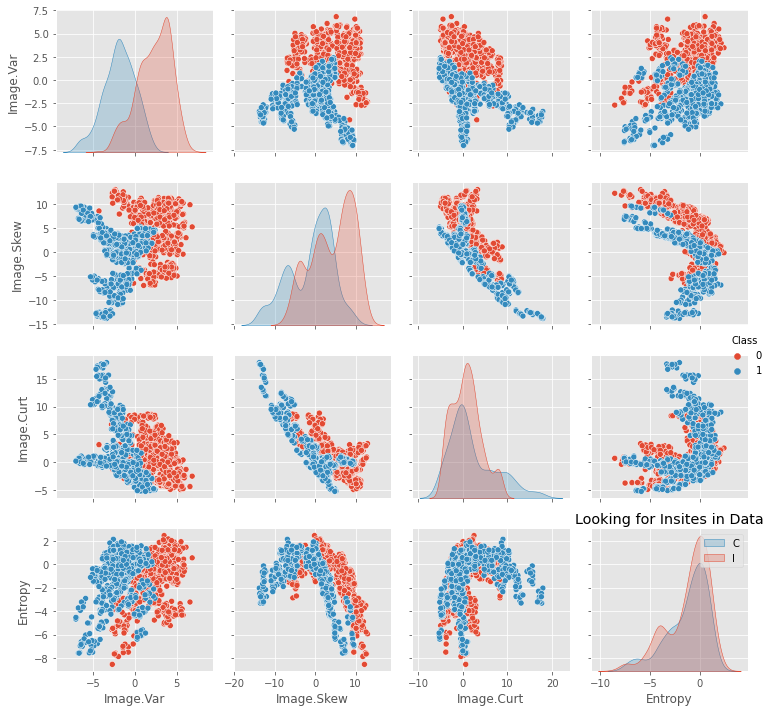

In [8]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="Class")
plt.title("Looking for Insites in Data")
plt.legend("Class")
plt.tight_layout()
plt.plot()

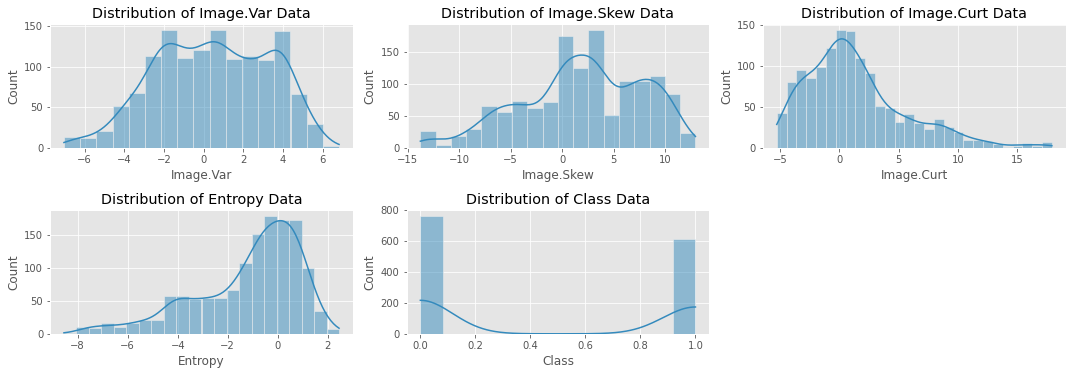

In [9]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [10]:
fig = px.box(df,y="Entropy",x="Class",title=f"Distrubution of Age")
fig.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
predictors = df.columns[0:4]

X_train, X_test, y_train, y_test = train_test_split(df[predictors], df.Class, train_size = 0.8)

print(X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape)

(1097, 4) (1097,) (275, 4) (275,)


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_hat = gb.predict(X_test)



In [13]:
# Accuracy
gb_accuracy = gb.score(X_test, y_test)
print(f'The accuracy is: {gb_accuracy}')

The accuracy is: 0.9963636363636363


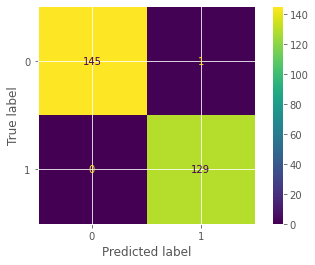

In [15]:
cm = confusion_matrix(y_test, y_hat)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       156
           1       1.00      0.99      1.00       119

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



Confusion Matrix:
We employ the Gradient Boosting Classifier and plot its confusion matrix. Overall, the model performs well. There is only "1" false negative and there is no false positive. This is why the f1-score is almost 1.
